#UE 3.4 - TD n°4 - Tracé d'une courbe de NECR

In [4]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
#Importation des données
data = pd.read_excel("exercice_necr_etudiant.xlsx")

print(data.head())

   Av      T    R     S          NECR
0   1  10021   52   791   9243.413200
1   2  19957  105  1516  18457.774075
2   3  29154  186  2224  26928.010265
3   4  37917  298  2929  34943.099577
4   5  46059  501  3607  42287.389738


In [3]:
#Variables
Av = data["Av"]
True_ = data["T"]
Random = data["R"]
Scatter = data["S"]
NECR = data["NECR"]

In [5]:
#Interpolation spline cubique
spline_true = CubicSpline(Av, True_)
spline_random = CubicSpline(Av, Random)
spline_scatter = CubicSpline(Av, Scatter)
spline_necr = CubicSpline(Av, NECR)

x_dense = np.linspace(min(Av), max(Av), 500)
y_spline_true = spline_true(x_dense)
y_spline_random = spline_random(x_dense)
y_spline_scatter = spline_scatter(x_dense)
y_spline_necr = spline_necr(x_dense)


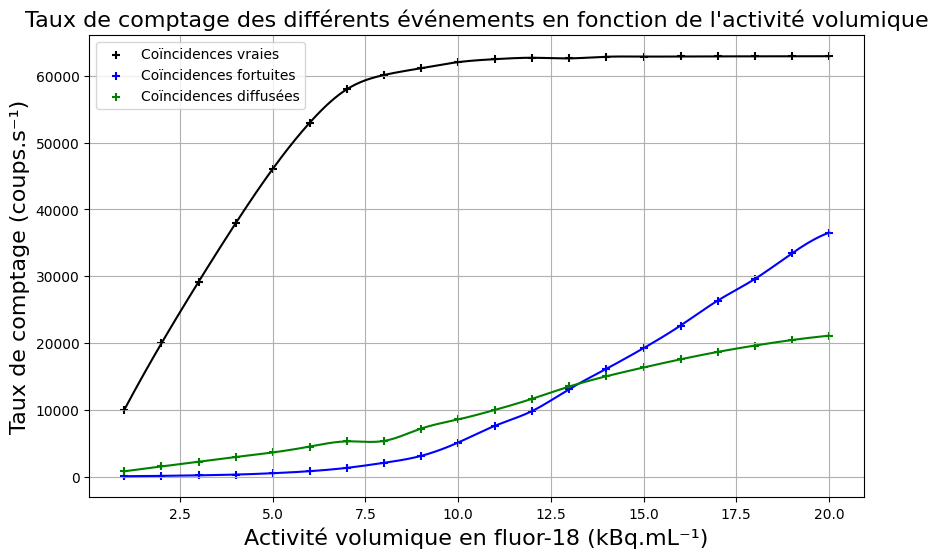

In [6]:
#Tracé des coïncidences
plt.figure(figsize=(10,6))
plt.scatter(Av, True_, marker='+', color='black', label='Coïncidences vraies')
plt.plot(x_dense, y_spline_true, color='black')
plt.scatter(Av, Random, marker='+', color='blue', label='Coïncidences fortuites')
plt.plot(x_dense, y_spline_random, color='blue')
plt.scatter(Av, Scatter, marker='+', color='green', label="Coïncidences diffusées")
plt.plot(x_dense, y_spline_scatter, color='green')
plt.xlabel("Activité volumique en fluor-18 (kBq.mL\u207B\u00B9)", fontsize=16)
plt.ylabel("Taux de comptage (coups.s\u207B\u00B9)", fontsize=16)
plt.title("Taux de comptage des différents événements en fonction de l'activité volumique", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

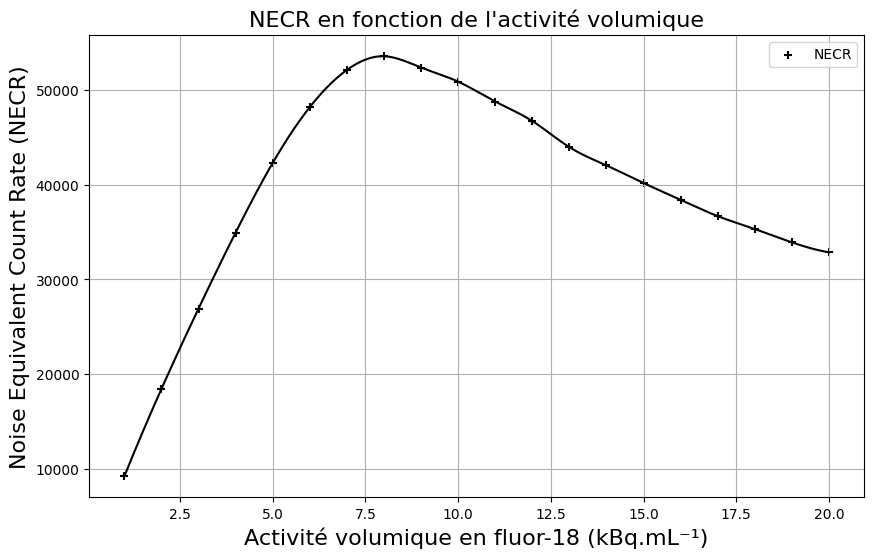

In [7]:
#Tracé de la courbe du NECR
plt.figure(figsize=(10,6))
plt.scatter(Av, NECR, marker='+', color='black', label='NECR')
plt.plot(x_dense, y_spline_necr, color='black')
plt.xlabel("Activité volumique en fluor-18 (kBq.mL\u207B\u00B9)", fontsize=16)
plt.ylabel("Noise Equivalent Count Rate (NECR)", fontsize=16)
plt.title("NECR en fonction de l'activité volumique", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()